# Results of different f values

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<Figure size 1332x756 with 0 Axes>

In [200]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,active_time,planner_time,damage,num_disabled
0,ClusteringAssignmentPlanner,1.1,100,10.0,5.0,1097.262344,0.259248,49690.432154,100.0
1,ClusteringAssignmentPlanner,1.1,500,10.0,5.0,1420.874836,3.183511,343911.379454,500.0
2,ClusteringAssignmentPlanner,1.2,100,10.0,5.0,579.207598,0.254573,25964.655200,100.0
3,ClusteringAssignmentPlanner,1.3,100,10.0,5.0,402.844100,0.254952,17781.934185,100.0
4,ClusteringAssignmentPlanner,1.4,100,10.0,5.0,312.700440,0.259604,13714.375743,100.0


In [201]:
num_agents = 500

results = results.loc[results['num_agents']==num_agents]

planners_names = ['StaticLinePlanner', 'TravelingLinePlanner','SeparateTravelingPlanner','IterativeAssignmentPlanner',
                  'ClusteringAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1


### damage as function of f

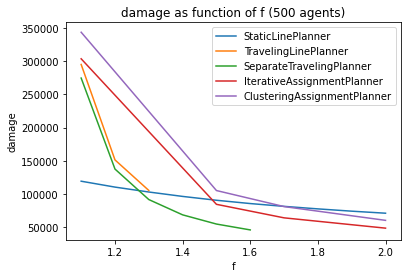

In [202]:
title = f'damage as function of f ({num_agents} agents)'
plt.title(title)
plt.xlabel('f')
plt.ylabel('damage')

for r in planners_results:
    plt.plot(list(r['f']),list(r['damage']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()

### active time as function of f

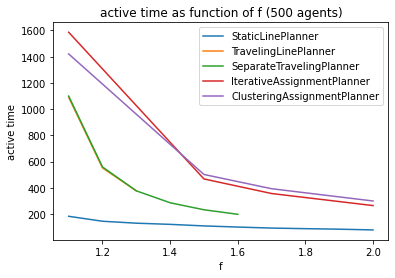

In [203]:
title = f'active time as function of f ({num_agents} agents)'
plt.title(title)
plt.xlabel('f')
plt.ylabel('active time')

for r in planners_results:
    plt.plot(list(r['f']),list(r['active_time']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### planner time as function of f

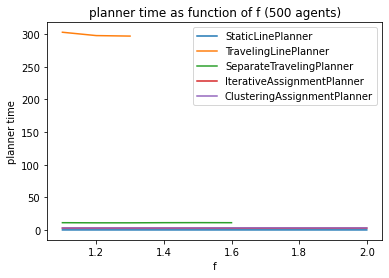

In [204]:
title = f'planner time as function of f ({num_agents} agents)'
plt.title(title)
plt.xlabel('f')
plt.ylabel('planner time')

for r in planners_results:
    plt.plot(list(r['f']),list(r['planner_time']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### #disabled as function of f

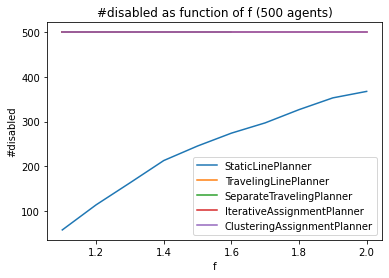

In [205]:
title = f'#disabled as function of f ({num_agents} agents)'
plt.title(title)
plt.xlabel('f')
plt.ylabel('#disabled')

for r in planners_results:
    plt.plot(list(r['f']),list(r['num_disabled']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()



